<a href="https://colab.research.google.com/github/craks31/16346597_pds/blob/main/PDS%20A3/src/Data_analysis_src.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset and displaying sample data values

In [30]:
d = pd.read_csv('/content/sample_data/DIABETES_DATA.csv')
d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


a) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison.

Mean Glucose value is: 120.89
Highest Glucose value is: 199

Sample Mean Glucose value is: 130.84
Sample Highest Glucose value is: 187


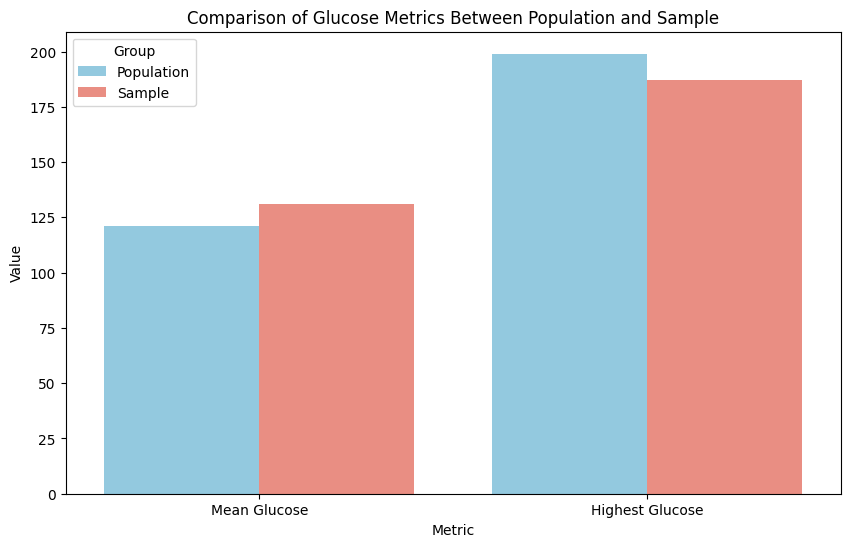

In [31]:
np.random.seed(242)

sample_data = d.sample(25)


population_mean_glucose = d['Glucose'].mean()
population_highest_glucose = d['Glucose'].max()

sample_mean_glucose = sample_data['Glucose'].mean()
sample_highest_glucose = sample_data['Glucose'].max()


print(f"Mean Glucose value is: {population_mean_glucose:.2f}")
print(f"Highest Glucose value is: {population_highest_glucose}")

print(f"\nSample Mean Glucose value is: {sample_mean_glucose:.2f}")
print(f"Sample Highest Glucose value is: {sample_highest_glucose}")

df_comparison = pd.DataFrame({
    'Metric': ['Mean Glucose', 'Highest Glucose'],
    'Population': [population_mean_glucose, population_highest_glucose],
    'Sample': [sample_mean_glucose, sample_highest_glucose]
})

df_comparison_melted = pd.melt(df_comparison, id_vars='Metric', var_name='Group', value_name='Value')

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Group', data=df_comparison_melted, palette=['skyblue', 'salmon'])
plt.title('Comparison of Glucose Metrics Between Population and Sample')
plt.show()


b) Find the 98th percentile of BMI of your sample and the population and compare the results using charts.

Population 98th Percentile BMI: 47.53
Sample 98th Percentile BMI: 45.85


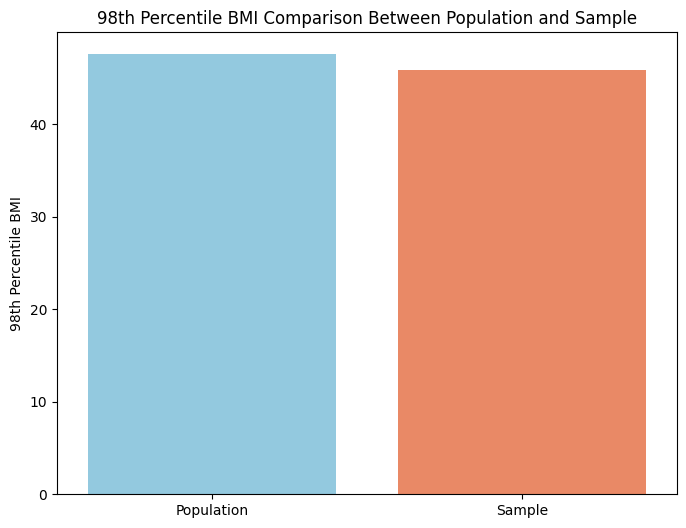

In [32]:



population_98th_percentile_bmi = np.percentile(d['BMI'], 98)
sample_98th_percentile_bmi = np.percentile(sample_data['BMI'], 98)

print(f"Population 98th Percentile BMI: {population_98th_percentile_bmi:.2f}")
print(f"Sample 98th Percentile BMI: {sample_98th_percentile_bmi:.2f}")


plt.figure(figsize=(8, 6))

sns.barplot(x=['Population', 'Sample'], y=[population_98th_percentile_bmi, sample_98th_percentile_bmi], palette=['skyblue', 'coral'])
plt.title('98th Percentile BMI Comparison Between Population and Sample')
plt.ylabel('98th Percentile BMI')
plt.show()


c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable. Again, you should create charts for this comparison. Report on your findings.

Population Mean Blood Pressure: 69.11
Population Standard Deviation Blood Pressure: 19.36
Population 90th Percentile Blood Pressure: 88.0
Sample Mean: 69.05
Sample Standard Deviation: 19.24
Sample 90th Percentile: 87.36


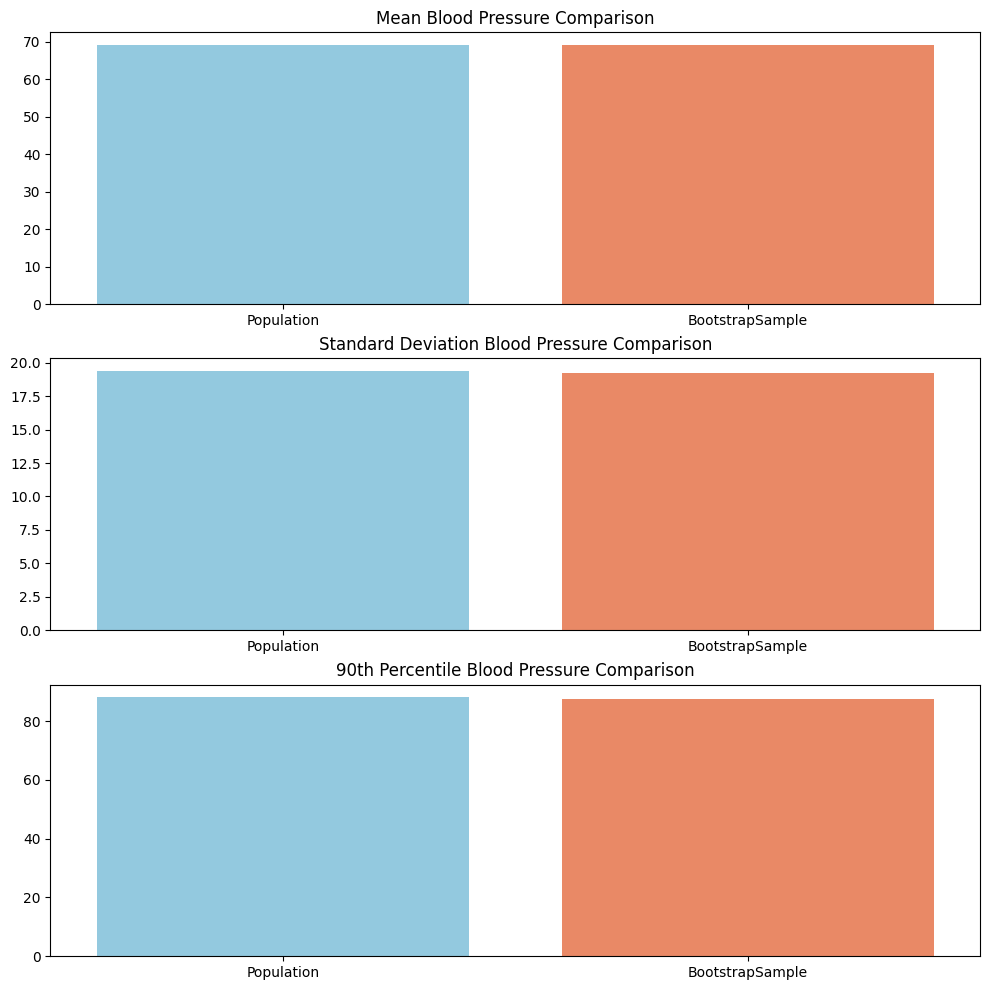

In [33]:
num_bootstrap_samples = 500
sample_size = 150

bootstrap_samples = [np.random.choice(d['BloodPressure'], size=sample_size, replace=True) for _ in range(num_bootstrap_samples)]

population_mean_bp = d['BloodPressure'].mean()
population_std_dev_bp = d['BloodPressure'].std()
population_percentile_bp = np.percentile(d['BloodPressure'], 90)

bootstrap_means = [np.mean(sample) for sample in bootstrap_samples]
bootstrap_std_devs = [np.std(sample) for sample in bootstrap_samples]
bootstrap_percentiles = [np.percentile(sample, 90) for sample in bootstrap_samples]

print(f"Population Mean Blood Pressure: {population_mean_bp:.2f}")
print(f"Population Standard Deviation Blood Pressure: {population_std_dev_bp:.2f}")
print(f"Population 90th Percentile Blood Pressure: {population_percentile_bp}")


print(f"Sample Mean: {np.mean(bootstrap_means):.2f}")
print(f"Sample Standard Deviation: {np.mean(bootstrap_std_devs):.2f}")
print(f"Sample 90th Percentile: {np.mean(bootstrap_percentiles):.2f}")

fig, axes = plt.subplots(3, 1, figsize=(12, 12))

sns.barplot(x=['Population', 'BootstrapSample'], y=[population_mean_bp, np.mean(bootstrap_means)], ax=axes[0],palette=['skyblue', 'coral'])
axes[0].set_title('Mean Blood Pressure Comparison')

sns.barplot(x=['Population', 'BootstrapSample'], y=[population_std_dev_bp, np.mean(bootstrap_std_devs)], ax=axes[1],palette=['skyblue', 'coral'])
axes[1].set_title('Standard Deviation Blood Pressure Comparison')

sns.barplot(x=['Population', 'BootstrapSample'], y=[population_percentile_bp, np.mean(bootstrap_percentiles)], ax=axes[2],palette=['skyblue', 'coral'])
axes[2].set_title('90th Percentile Blood Pressure Comparison')

plt.show()
